## Install Libraries and Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [ ]:
# TODO one function to plot lol

In [4]:
df = pd.read_csv('/home/mariam/PycharmProjects/recommendation-systems/data/ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'], engine='python')
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [6]:
df.shape

(100000, 4)

In [15]:
#check for null values
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [14]:
df.duplicated().sum()

0

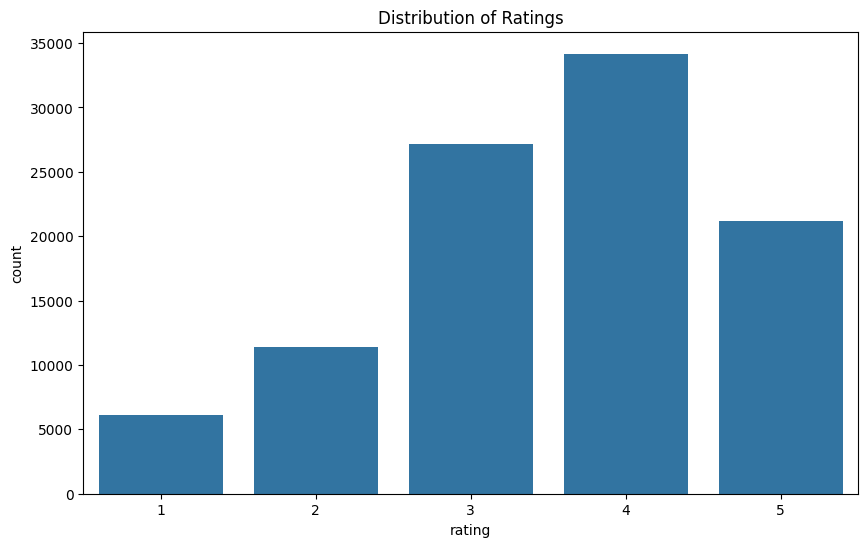

In [7]:
#@title rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df) 
plt.title('Distribution of Ratings')
plt.show()

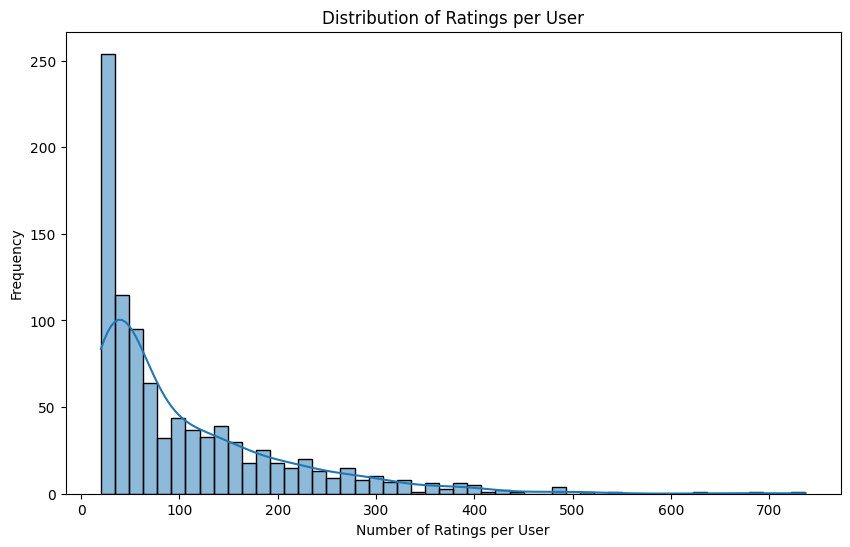

In [8]:
#@Title Distribution of the number of ratings per user
user_ratings_count = df.groupby('user_id')['rating'].count()
plt.figure(figsize=(10, 6))
sns.histplot(user_ratings_count, bins=50, kde=True)
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.show()

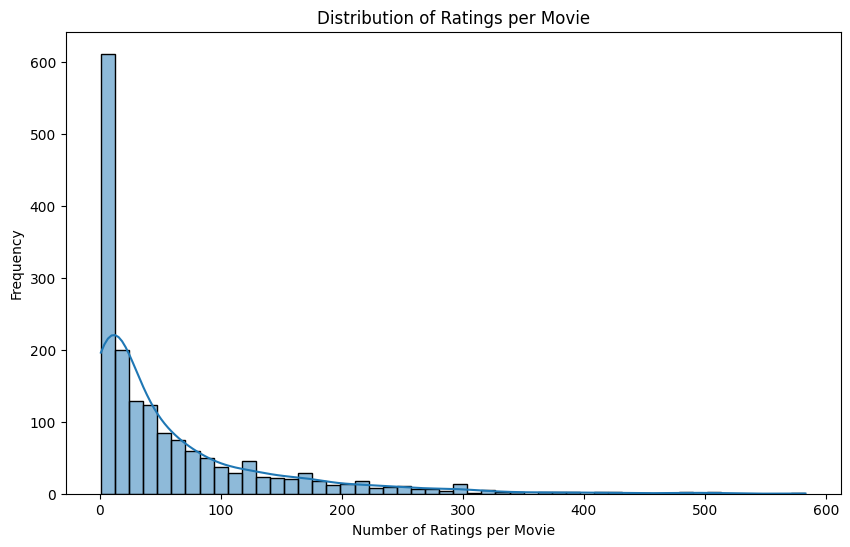

In [10]:
#@Titel Distribution of the number of ratings per movie
movie_ratings_count = df.groupby('item_id')['rating'].count()
plt.figure(figsize=(10, 6))
sns.histplot(movie_ratings_count, bins=50, kde=True)
plt.title('Distribution of Ratings per Movie')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Frequency')
plt.show()

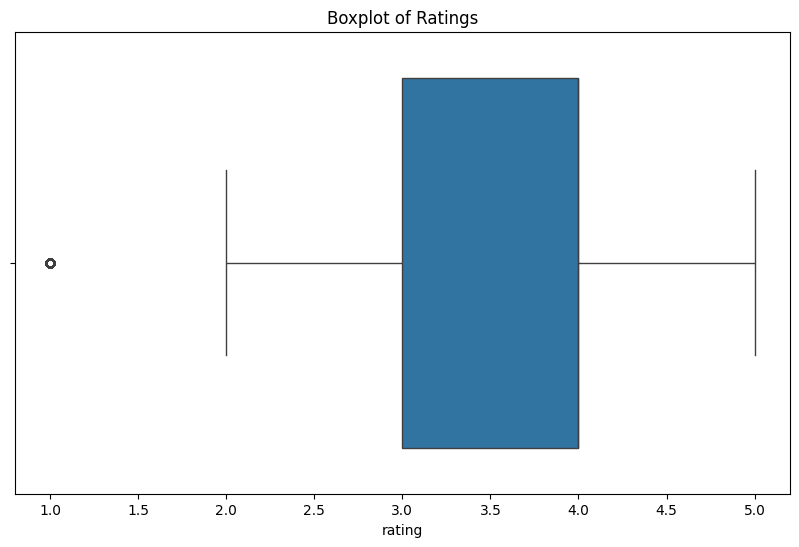

In [11]:
#@Title Check for outliers and anomalies in ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', data=df)
plt.title('Boxplot of Ratings')
plt.show()

In [23]:
df[df["rating"]==1].shape

(6110, 4)

In [30]:
 #read users information
 df_users = pd.read_csv('/home/mariam/PycharmProjects/recommendation-systems/data/ml-100k/u.user', engine='python', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

In [31]:
df_users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


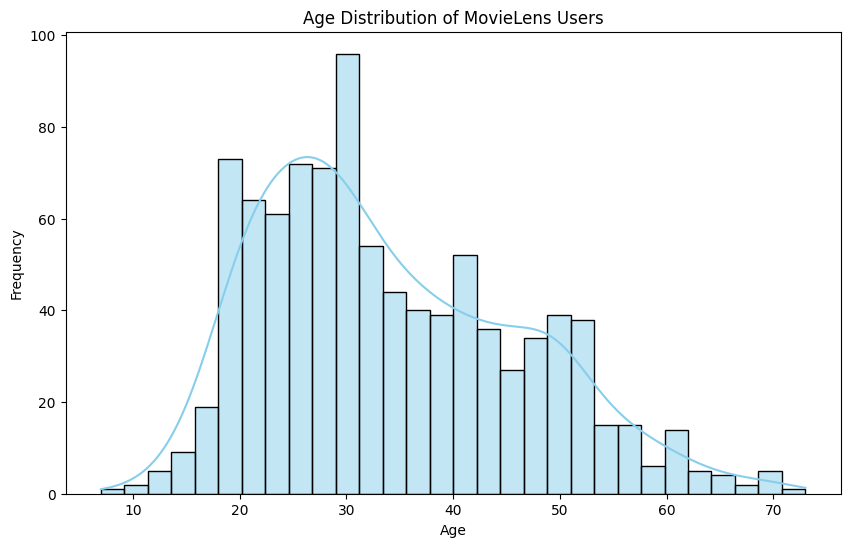

In [32]:
# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_users['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of MovieLens Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

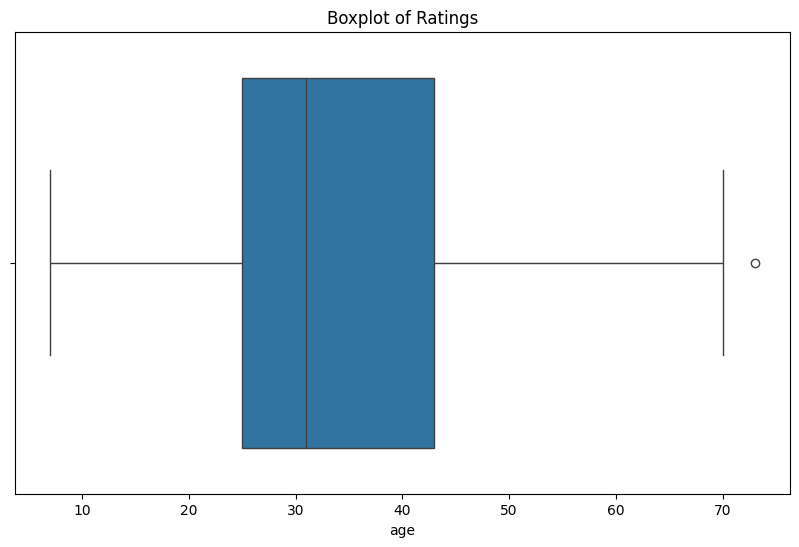

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', data=df_users)
plt.title('Boxplot of Ratings')
plt.show()

In [36]:
df_users[df_users["age"]<15].shape

(11, 5)

In [43]:
df_item = pd.read_csv("/home/mariam/PycharmProjects/recommendation-systems/data/ml-100k/u.item", sep='|', engine='python', encoding="ISO-8859-1" ,
                      names=['item_id', 'title', 'release_date', 'video_release_date', 'url', 'unknown' , 'Action' , 'Adventure', 'Animation', 
              "Children's" , 'Comedy' ,'Crime' , 'Documentary' , 'Drama',  'Fantasy' , 'Film-Noir', 'Horror', 'Musical' , 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

df_item.head()

,item_id,title,release_date,video_release_date,url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


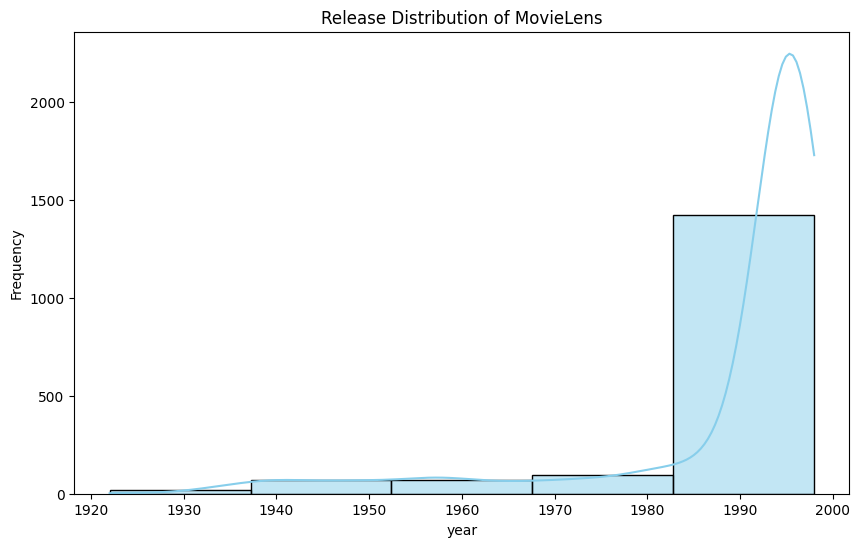

In [50]:
df_item["release_date"] = pd.to_datetime(df_item['release_date'])
df_item["release_year"] = df_item['release_date'].dt.year
df_item["release_month"] = df_item['release_date'].dt.month

plt.figure(figsize=(10, 6))
sns.histplot(df_item['release_year'], bins=5, kde=True, color='skyblue')
plt.title('Release Distribution of MovieLens')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.show()

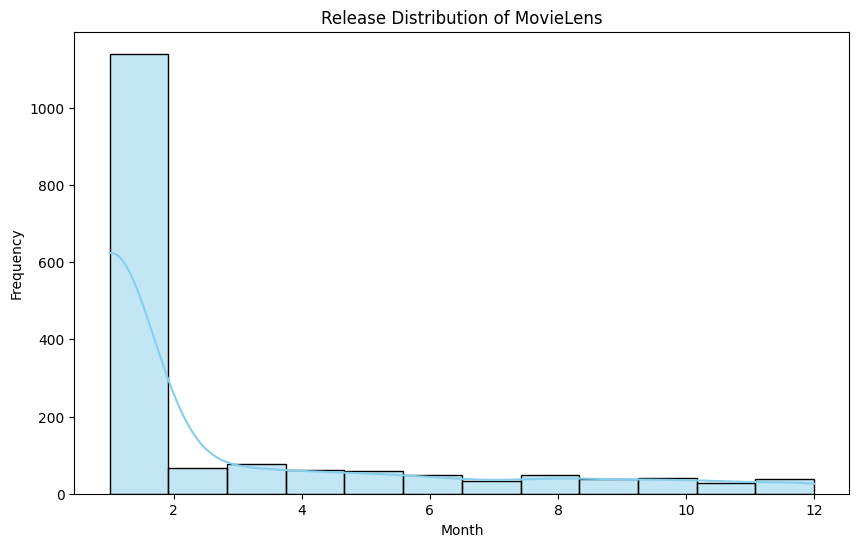

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df_item['release_month'], bins=12, kde=True, color='skyblue')
plt.title('Release Distribution of MovieLens')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

## Data Preprocessing and Cleaning

In [58]:
# TODO encode months, year, genre, age, ocupation, gender
# to work on item id user id rating all this columns ^
# df_users["gender"] = [0 if x == "M" else 1 for x in df_users["gender"]]
# 
labels = ["1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s"]
bins = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000]
df_item["year_category"] = pd.cut(df_item["release_year"], bins=bins, labels=labels, right=False)


In [59]:
df_item.head()

,item_id,title,release_date,video_release_date,url,unknown,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year,release_month,year_category
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,1995.0,1.0,1990s
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,1,0,0,1995.0,1.0,1990s
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,1,0,0,1995.0,1.0,1990s
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,1995.0,1.0,1990s
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,1,0,0,1995.0,1.0,1990s


In [62]:
df_item['month_sin'] = np.sin(2 * np.pi * df_item['release_month'] / 12)
df_item['month_cos'] = np.cos(2 * np.pi * df_item['release_month'] / 12)

In [64]:
# Define the bins and labels
bins = [10,15, 25, 35, 45, 55,100]
labels = ['10-15', '16-25', '26-35', '36-45', '46-55', '55-100']

# Create a new column 'age_group' with the bin labels
df_users['age_group'] = pd.cut(df_users['age'], bins=bins, labels=labels, right=False)

In [65]:
df_users.head()

,user_id,age,gender,occupation,zip_code,age_group
0,1,24,0,technician,85711,16-25
1,2,53,1,other,94043,46-55
2,3,23,0,writer,32067,16-25
3,4,24,0,technician,43537,16-25
4,5,33,1,other,15213,26-35


In [66]:
df_item.head()

,item_id,title,release_date,video_release_date,url,unknown,Action,Adventure,Animation,Children's,...,Romance,Sci-Fi,Thriller,War,Western,release_year,release_month,year_category,month_sin,month_cos
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,1995.0,1.0,1990s,0.5,0.866025
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,1,0,0,1995.0,1.0,1990s,0.5,0.866025
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,1,0,0,1995.0,1.0,1990s,0.5,0.866025
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,1995.0,1.0,1990s,0.5,0.866025
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,1,0,0,1995.0,1.0,1990s,0.5,0.866025


In [67]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [70]:
df_item.drop(columns=['release_month', 'release_year', 'title', "release_date", "video_release_date", "url"]).to_csv('/home/mariam/PycharmProjects/recommendation-systems/data/preprocessed/items.csv')

In [72]:
df.drop(columns=['timestamp']).to_csv("/home/mariam/PycharmProjects/recommendation-systems/data/preprocessed/ratings.csv")


In [73]:
df_users.drop(columns=['zip_code', 'age', 'occupation']).to_csv("/home/mariam/PycharmProjects/recommendation-systems/data/preprocessed/users.csv")